<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
# For ease of execution I used df
df = pd.read_csv('./imdb_1000.csv')
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Rows followed by column counts
df.shape

(979, 6)

#### Check the data type of each column.

In [4]:
df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
print('The average length of a movie is ' + format(round(df.duration.mean(),2)) +  ' minutes.')

The average length of a movie is 120.98 minutes.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# sorted by the longest movies (first five results shown)
df.sort_values(by=['duration'], ascending=False).head(5)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


In [7]:
# sorted by the shortest movies (last five results shown)
df.sort_values(by=['duration'], ascending=True).head(5)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

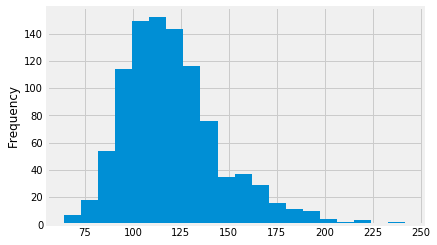

In [60]:
df.duration.plot(kind='hist', bins=20);

#### Use a box plot to display that same data.

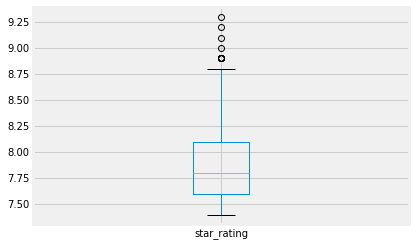

In [9]:
df.drop('duration', axis=1).boxplot()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Check the titles of the movies for duplicates and spot check to see if they are actually different movies. They are. 
df[df['title'].map(df['title'].value_counts()) > 1]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [11]:
# How many movies have each content rating 
df.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

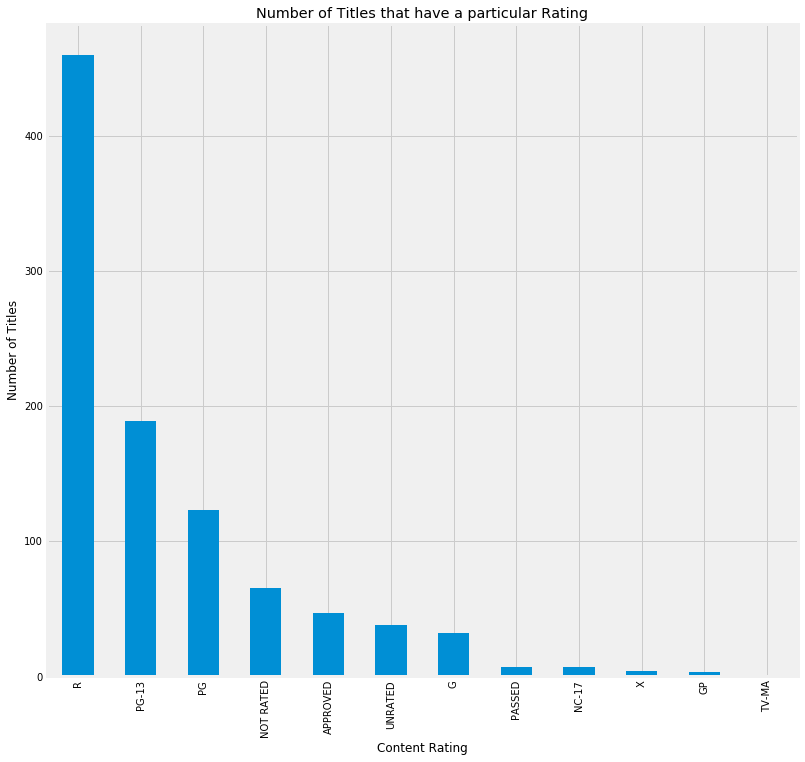

In [12]:
df.content_rating.value_counts().plot(kind='bar', figsize=(12,12));     # bigger plot by increasing age
plt.xlabel('Content Rating');
plt.ylabel('Number of Titles');
plt.title('Number of Titles that have a particular Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
# check the current counts of ratings 
df.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [14]:
# Do a search and replace on content ratings and assign to NOT RATED and creata new dataframe df1
df1 = df.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP', 'X', 'TV-MA' ],['UNRATED', 'UNRATED', 'UNRATED', 'UNRATED', 'NC-17', 'NC-17'])
df1.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
# See answer above for the combined

#### Count the number of missing values in each column.

In [16]:
# There are three missing values
df1.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
# Yes. content_rating has three observations with null values
df1[df1.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [18]:
# Change the missing values to 'UNRATED'
df1.content_rating.fillna(value='UNRATED', inplace=True)

In [19]:
# check to see that there are no missing values
df1[df1.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list


In [20]:
# check that the UNRATED count has gone up by 3
df1.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [21]:
df1.star_rating.value_counts()

7.6    124
7.8    116
7.7    113
7.5    108
8.1    103
8.0     97
7.9     75
8.2     51
7.4     49
8.3     43
8.4     37
8.5     23
8.6     15
8.7     10
8.9      6
8.8      5
9.3      1
9.2      1
9.1      1
9.0      1
Name: star_rating, dtype: int64

In [22]:
print("Average Start Rating for movies less than 120 minutes: {}".format(df1[df1.duration < 120].star_rating.mean()))

Average Start Rating for movies less than 120 minutes: 7.838666666666657


In [23]:
print("Average Start Rating for movies greater than or equal to 120 minutes: {}".format(df1[df1.duration >= 120].star_rating.mean()))

Average Start Rating for movies greater than or equal to 120 minutes: 7.948898678414082


#### Use a visualization to detect whether there is a relationship between duration and star rating.

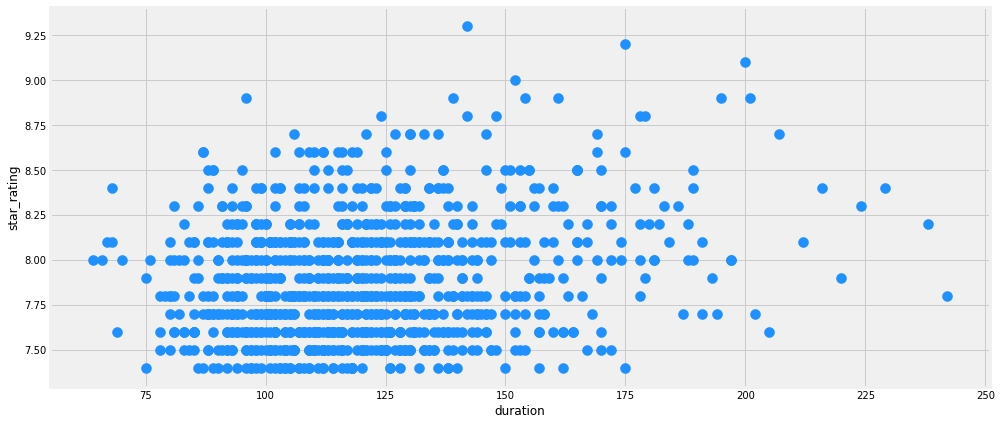

In [24]:
df.plot(x='duration', y='star_rating', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

In [25]:
# Check correlation. There is no meaningful correlation except perhaps on the outer outliers
df.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [26]:
df.groupby('genre').duration.mean().round(1)

genre
Action       126.5
Adventure    134.8
Animation     96.6
Biography    131.8
Comedy       107.6
Crime        122.3
Drama        126.5
Family       107.5
Fantasy      112.0
Film-Noir     97.3
History       66.0
Horror       102.5
Mystery      115.6
Sci-Fi       109.0
Thriller     114.2
Western      136.7
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

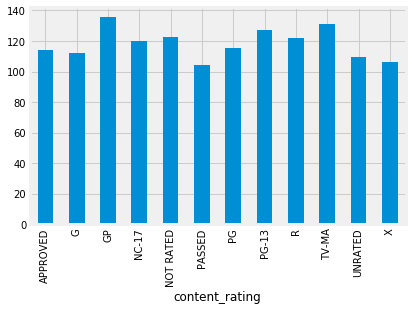

In [27]:
df.groupby('content_rating').duration.mean().plot(kind="bar")

#### Determine the top rated movie (by star rating) for each genre.

In [28]:
# Concatenate title and duration to check in case one of the titles returned is one of the "duplicate" titles
df1['title_duration'] = df1['title'].astype(str) + '_' +df1['duration'].astype(str)

In [29]:
# Create a list of unique genres
a = df1.genre.unique().tolist()
a

['Crime',
 'Action',
 'Drama',
 'Western',
 'Adventure',
 'Biography',
 'Comedy',
 'Animation',
 'Mystery',
 'Horror',
 'Film-Noir',
 'Sci-Fi',
 'History',
 'Thriller',
 'Family',
 'Fantasy']

In [30]:
# METHOD CREATE FILTERS IN DATAFRAME

In [31]:
# Step 1. Find the max value of star rating for one genre
example_max_value = df1[df1['genre'] == 'Drama']['star_rating'].max()
print(example_max_value)

8.9


In [32]:
# Step 2. Bring back the rows in the data frame that have the max value for the genere
df1[(df1['genre'] == 'Drama') & (df1['star_rating'] == example_max_value)]

,star_rating,title,content_rating,genre,duration,actors_list,title_duration
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",12 Angry Men_96
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",Fight Club_139


In [33]:
# Step 3 pulls back the genre and title_duration columns 
df1[['genre','title_duration', 'star_rating']]

,genre,title_duration,star_rating
0,Crime,The Shawshank Redemption_142,9.3
1,Crime,The Godfather_175,9.2
2,Crime,The Godfather: Part II_200,9.1
3,Action,The Dark Knight_152,9.0
4,Crime,Pulp Fiction_154,8.9
...,...,...,...
974,Comedy,Tootsie_116,7.4
975,Adventure,Back to the Future Part III_118,7.4
976,Action,Master and Commander: The Far Side of the Worl...,7.4
977,Horror,Poltergeist_114,7.4


In [34]:
# Combines 3 staps of code. 
# Step 1. Find the max value of star rating for one genre
# Step 2. Bring back the rows in the data frame that have the max value
# pulls back the genre title_duration and star_rating column
df1[(df1['genre'] == 'Drama') & (df1['star_rating'] == df1[df1['genre'] == 'Drama']['star_rating'].max())][['genre','title_duration', 'star_rating']]

,genre,title_duration,star_rating
5,Drama,12 Angry Men_96,8.9
9,Drama,Fight Club_139,8.9


In [35]:
a = df1[(df1['genre'] == 'Crime') & (df1['star_rating'] == df1[df1['genre'] == 'Crime']['star_rating'].max())][['genre','title_duration', 'star_rating']]
b = df1[(df1['genre'] == 'Action') & (df1['star_rating'] == df1[df1['genre'] == 'Action']['star_rating'].max())][['genre','title_duration', 'star_rating']] 
c = df1[(df1['genre'] == 'Drama') & (df1['star_rating'] == df1[df1['genre'] == 'Drama']['star_rating'].max())][['genre','title_duration', 'star_rating']]
d = df1[(df1['genre'] == 'Western') & (df1['star_rating'] == df1[df1['genre'] == 'Western']['star_rating'].max())][['genre','title_duration', 'star_rating']]
e = df1[(df1['genre'] == 'Adventure') & (df1['star_rating'] == df1[df1['genre'] == 'Adventure']['star_rating'].max())][['genre','title_duration', 'star_rating']]
f = df1[(df1['genre'] == 'Biography') & (df1['star_rating'] == df1[df1['genre'] == 'Biography']['star_rating'].max())][['genre','title_duration', 'star_rating']]
g = df1[(df1['genre'] == 'Comedy') & (df1['star_rating'] == df1[df1['genre'] == 'Comedy']['star_rating'].max())][['genre','title_duration', 'star_rating']]
h = df1[(df1['genre'] == 'Animation') & (df1['star_rating'] == df1[df1['genre'] == 'Animation']['star_rating'].max())][['genre','title_duration', 'star_rating']]
i = df1[(df1['genre'] == 'Mystery') & (df1['star_rating'] == df1[df1['genre'] == 'Mystery']['star_rating'].max())][['genre','title_duration', 'star_rating']]
j = df1[(df1['genre'] == 'Horror') & (df1['star_rating'] == df1[df1['genre'] == 'Horror']['star_rating'].max())][['genre','title_duration', 'star_rating']]
k = df1[(df1['genre'] == 'Film-Noir') & (df1['star_rating'] == df1[df1['genre'] == 'Film-Noir']['star_rating'].max())][['genre','title_duration', 'star_rating']]
l = df1[(df1['genre'] == 'Sci-Fi') & (df1['star_rating'] == df1[df1['genre'] == 'Sci-Fi']['star_rating'].max())][['genre','title_duration', 'star_rating']]
m = df1[(df1['genre'] == 'History') & (df1['star_rating'] == df1[df1['genre'] == 'History']['star_rating'].max())][['genre','title_duration', 'star_rating']]
n = df1[(df1['genre'] == 'Thriller')& (df1['star_rating'] == df1[df1['genre'] == 'Thriller']['star_rating'].max())][['genre','title_duration', 'star_rating']]
o = df1[(df1['genre'] == 'Family') & (df1['star_rating'] == df1[df1['genre'] == 'Family']['star_rating'].max())][['genre','title_duration', 'star_rating']]
p = df1[(df1['genre'] == 'Fantasy') & (df1['star_rating'] == df1[df1['genre'] == 'Fantasy']['star_rating'].max())][['genre','title_duration', 'star_rating']]

In [36]:
pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p]).sort_values('genre')

,genre,title_duration,star_rating
3,Action,The Dark Knight_152,9.0
7,Adventure,The Lord of the Rings: The Return of the King_201,8.9
30,Animation,Spirited Away_125,8.6
8,Biography,Schindler's List_195,8.9
35,Comedy,Modern Times_87,8.6
29,Comedy,City Lights_87,8.6
25,Comedy,Life Is Beautiful_116,8.6
0,Crime,The Shawshank Redemption_142,9.3
9,Drama,Fight Club_139,8.9
5,Drama,12 Angry Men_96,8.9


In [37]:
# I built a funciton using loops but couldn't get it to work

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [38]:
# Check the titles of the movies for duplicates and spot check to see if they are actually different movies. They are. 
# The movies are not duplicates. Durations and actor list are different for the duplicate titles. 
df1[df1['title'].map(df['title'].value_counts()) > 1]

,star_rating,title,content_rating,genre,duration,actors_list,title_duration
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",The Girl with the Dragon Tattoo_158
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",The Girl with the Dragon Tattoo_152
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",True Grit_110
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",Les Miserables_158
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",Dracula_85
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",Dracula_128
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",Les Miserables_134
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True Grit_128


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [39]:
# create dictionary of Genres with value counts as the values
genre_value_counts = df1['genre'].value_counts().to_dict()
genre_value_counts

{'Drama': 278,
 'Comedy': 156,
 'Action': 136,
 'Crime': 124,
 'Biography': 77,
 'Adventure': 75,
 'Animation': 62,
 'Horror': 29,
 'Mystery': 16,
 'Western': 9,
 'Sci-Fi': 5,
 'Thriller': 5,
 'Film-Noir': 3,
 'Family': 2,
 'History': 1,
 'Fantasy': 1}

In [40]:
# Filter the dictionary so only genres are included that have more than 10 titles.
genre_greater_than_10_titles = dict((k, v) for k, v in genre_value_counts.items() if v >= 10)
genre_greater_than_10_titles

{'Drama': 278,
 'Comedy': 156,
 'Action': 136,
 'Crime': 124,
 'Biography': 77,
 'Adventure': 75,
 'Animation': 62,
 'Horror': 29,
 'Mystery': 16}

In [52]:
# Return dictionary keys of genres that have more than 10 titles 
def getList(genre_greater_than_10_titles): 
    return genre_greater_than_10_titles.keys() 
genre_greater_than_10_list = getList(genre_greater_than_10_titles)
genre_greater_than_10_list

dict_keys(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery'])

In [54]:
# Create a new data frame df2 that only includes the rows that are associated to the genres that have 10 or more movies
df2 = df1[df1['genre'].isin(genre_greater_than_10_list)]
df2.head(1)

,star_rating,title,content_rating,genre,duration,actors_list,title_duration
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",The Shawshank Redemption_142


In [55]:
# check the value counts for df2 for genre
df2.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64

In [56]:
# Average star ratings for genres that have 10 titles or more
df2.groupby('genre').star_rating.mean().sort_values(ascending=False)

genre
Mystery      7.975000
Adventure    7.933333
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Comedy       7.822436
Horror       7.806897
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [125]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [126]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [127]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [128]:
# Check head
df2.head(1)

,star_rating,title,content_rating,genre,duration,actors_list,title_duration
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",The Shawshank Redemption_142


In [129]:
# Check data types
df2.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
title_duration     object
dtype: object

In [166]:
test = df2['actors_list'].str.replace('u','').tolist()
test 

["['Tim Robbins', 'Morgan Freeman', 'Bob Gnton']",
 "['Marlon Brando', 'Al Pacino', 'James Caan']",
 "['Al Pacino', 'Robert De Niro', 'Robert Dvall']",
 "['Christian Bale', 'Heath Ledger', 'Aaron Eckhart']",
 "['John Travolta', 'Uma Thrman', 'Samel L. Jackson']",
 "['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']",
 "['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen']",
 "['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley']",
 "['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter']",
 "['Elijah Wood', 'Ian McKellen', 'Orlando Bloom']",
 "['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ellen Page']",
 "['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']",
 "['Tom Hanks', 'Robin Wright', 'Gary Sinise']",
 "['Elijah Wood', 'Ian McKellen', 'Viggo Mortensen']",
 "['Matthew McConaghey', 'Anne Hathaway', 'Jessica Chastain']",
 "['Jack Nicholson', 'Loise Fletcher', 'Michael Berryman']",
 "['Toshir\\xf4 Mifne', 'Takashi Shimra', 'Keiko Tsshima']",
 "['Robert De Niro', 'Ray Liotta', 'Joe Pesci']",
 "['Ma

In [182]:
# Daniel Radcliffe,Emma Watson & Rupert Grint were the group of actors who appeared the most in movies together for the IMBD 1000. 
# They appeared together six times. 
import collections
counter=collections.Counter(test)
print(counter.most_common(3))

[("['Daniel Radcliffe', 'Emma Watson', 'Rpert Grint']", 6), ("['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']", 3), ("['Michael J. Fox', 'Christopher Lloyd', 'Lea Thompson']", 2)]
